1. 100, 200, 300 IR curve data 만들기
2. 쿨롱 효율 논문 찾고 쿨롱 효율 나타내보기
3. 논문 코드 19 에서 피어슨 상광계수 나타내기, 및 color 다시 나타내기

In [1]:
import h5py
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import matplotlib.cm as cm
from scipy.signal import savgol_filter
from scipy import stats

batch1 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

numBat1 = len(batch1.keys())



batch2 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch2.pkl','rb'))
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']


numBat2 = len(batch2.keys())

batch3 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

numBat3 = len(batch3.keys())
numBat = numBat1 + numBat2 + numBat3
bat_dict = {**batch1, **batch2, **batch3}

In [2]:
#bat_dict keys
bat_dict.keys()

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45', 'b2c0', 'b2c1', 'b2c2', 'b2c3', 'b2c4', 'b2c5', 'b2c6', 'b2c10', 'b2c11', 'b2c12', 'b2c13', 'b2c14', 'b2c17', 'b2c18', 'b2c19', 'b2c20', 'b2c21', 'b2c22', 'b2c23', 'b2c24', 'b2c25', 'b2c26', 'b2c27', 'b2c28', 'b2c29', 'b2c30', 'b2c31', 'b2c32', 'b2c33', 'b2c34', 'b2c35', 'b2c36', 'b2c37', 'b2c38', 'b2c39', 'b2c40', 'b2c41', 'b2c42', 'b2c43', 'b2c44', 'b2c45', 'b2c46', 'b2c47', 'b3c0', 'b3c1', 'b3c3', 'b3c4', 'b3c5', 'b3c6', 'b3c7', 'b3c8', 'b3c9', 'b3c10', 'b3c11', 'b3c12', 'b3c13', 'b3c14', 'b3c15', 'b3c16', 'b3c17', 'b3c18', 'b3c19', 'b3c20', 'b3c21', 'b3c22', 'b3c24', 'b3c25', 'b3c26', 'b3c27', 'b3c28', 'b3c29', 'b3c30

In [3]:
# b1c0 keys()
bat_dict['b1c0'].keys()

dict_keys(['cycle_life', 'charge_policy', 'summary', 'cycles'])

In [4]:
#summary 에 IR 있음.
bat_dict['b1c0']['summary'].keys()

dict_keys(['IR', 'QC', 'QD', 'Tavg', 'Tmin', 'Tmax', 'chargetime', 'cycle'])

In [5]:
# 색 조절
sort=[]
for i in bat_dict.keys():
    a=len(bat_dict[i]['summary']['cycle'])
    sort.append([a,i])

Text(0.5, 1.0, 'MinMaxScale Color')

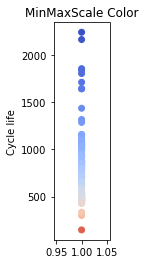

In [6]:
# 색 조절.
color=[]
cycle_=[]
plt.figure(figsize=(1,4))
for i,j in enumerate(bat_dict.keys()):
    sortcycle=bat_dict[j]['cycle_life']
    cycle_.append(sortcycle.tolist())
    c=(np.log10(sortcycle)-2)/(np.log10(2300)-2)
    color.append(c.tolist())

a=np.array(color).ravel()
b=np.array(cycle_).ravel()
changecolor=cm.coolwarm_r(a)
plt.scatter(np.ones(len(a)),b,c=cm.coolwarm_r(a))
plt.ylabel("Cycle life")
plt.title("MinMaxScale Color")

In [7]:
test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat);

# IR curve feature , Cycle 100 , 200, 300비교(Elastic Net 만 사용했음. Lasso , Ridge 는 추가적으로 넣을것) 

1.IR Curve feature, Cycle 100
- Cycle 2 IR
- Cycle 100 IR
- Cycle 90 to 100 slope
- Cycle 2 to 100 mean
- Cycle 2 to 100 Variance

2.IR Curve feature, Cycle 200
- Cycle 2 IR
- Cycle 100 IR (이 feature는 제거 전 후 비교하고 더 좋은 결과가 무엇인지 관찰해보기)
- Cycle 200 IR
- Cycle 190 to 200 slope
- Cycle 2 to 200 mean
- Cycle 2 to 200 variance

3.IR Curve feature, Cycle 300
- Cycle 2 IR
- Cycle 100 IR (이 feature는 제거 전 후 비교하고 더 좋은 결과가 무엇인지 관찰해보기)
- Cycle 200 IR (이 feature는 제거 전 후 비교하고 더 좋은 결과가 무엇인지 관찰해보기)
- Cycle 300 IR
- Cycle 290 to 300 slope
- Cycle 2 to 300 mean
- Cycle 2 to 300 variance

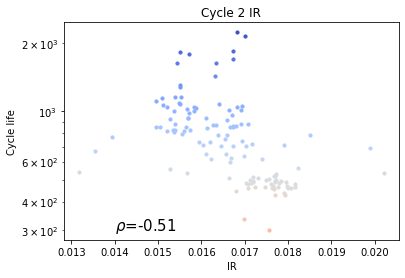

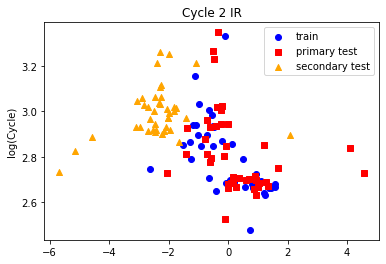

In [8]:
# 1. IR Curve feature, Cycle 100
# 1.1 Cycle 2 IR , Cycle life - label  

def Z_score(Train,prim_test,secondary):
    Z1=(Train-np.mean(Train))/np.std(Train)
    Z2=(prim_test-np.mean(Train))/np.std(Train)
    Z3=(secondary-np.mean(Train))/np.std(Train)
    return Z1, Z2, Z3


train_Cycle2_IR=[]
train_Cycle_life=[]

test_Cycle2_IR=[]
test_Cycle_life=[]

sec_Cycle2_IR=[]
sec_Cycle_life=[]

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if i in train_ind :
        train_Cycle2_IR.append(bat_dict[j]['summary']['IR'][2])
        train_Cycle_life.append(bat_dict[j]['cycle_life'][0][0])
        
    if i in test_ind :
        test_Cycle2_IR.append(bat_dict[j]['summary']['IR'][2])
        test_Cycle_life.append(bat_dict[j]['cycle_life'][0][0])
            
    if i in secondary_test_ind:
        sec_Cycle2_IR.append(bat_dict[j]['summary']['IR'][2])
        sec_Cycle_life.append(bat_dict[j]['cycle_life'][0][0])
        
Train_Cycle2_IR=np.array(train_Cycle2_IR)
Train_Cycle_life=np.array(train_Cycle_life)
Test_Cycle2_IR=np.array(test_Cycle2_IR)
Test_Cycle_life=np.array(test_Cycle_life)
Sec_Cycle2_IR=np.array(sec_Cycle2_IR)
Sec_Cycle_life=np.array(sec_Cycle_life)

TrainCycle2_IR=Train_Cycle2_IR.reshape(-1,1)
TestCycle2_IR=Test_Cycle2_IR.reshape(-1,1)
SecCycle2_IR=Sec_Cycle2_IR.reshape(-1,1)
Cycle_train=np.log10(Train_Cycle_life)
Cycle_test=np.log10(Test_Cycle_life)
Cycle_sec=np.log10(Sec_Cycle_life)

Z1_train,Z1_test,Z1_sec=Z_score(TrainCycle2_IR,TestCycle2_IR,SecCycle2_IR)

X_stack=np.hstack([Train_Cycle2_IR,Test_Cycle2_IR,Sec_Cycle2_IR])
Y_stack=np.hstack([Train_Cycle_life,Test_Cycle_life,Sec_Cycle_life])
logY_stack=np.hstack([Cycle_train,Cycle_test,Cycle_sec])
color=(logY_stack-2)/(np.log10(2300)-2)
no1_color=cm.coolwarm_r(color)
for i in range(len(X_stack)):
    plt.scatter(X_stack[i], Y_stack[i],s=10,color=no1_color[i])
    plt.yscale('log')
    plt.xlabel('IR')
    plt.ylabel('Cycle life')
    plt.title('Cycle 2 IR')
r = np.round(np.corrcoef(X_stack, logY_stack),2)
font={'size':15}
plt.text(0.014,300,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

plt.scatter(Z1_train,Cycle_train,color='blue',marker='o',label='train')
plt.scatter(Z1_test,Cycle_test,color='red',marker='s',label='primary test')
plt.scatter(Z1_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
plt.title('Cycle 2 IR')
plt.ylabel('log(Cycle)')
plt.legend()
plt.show()

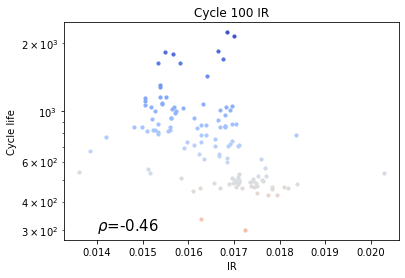

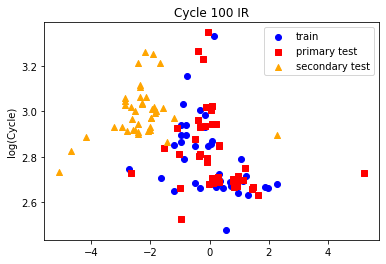

In [9]:
# 1.2 Cycle 100 IR 
train_Cycle100_IR=[]

test_Cycle100_IR=[]

sec_Cycle100_IR=[]

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if i in train_ind :
        train_Cycle100_IR.append(bat_dict[j]['summary']['IR'][100])
        
    if i in test_ind :
        test_Cycle100_IR.append(bat_dict[j]['summary']['IR'][100])
            
    if i in secondary_test_ind:
        sec_Cycle100_IR.append(bat_dict[j]['summary']['IR'][100])
        
Train_Cycle100_IR=np.array(train_Cycle100_IR)
Test_Cycle100_IR=np.array(test_Cycle100_IR)
Sec_Cycle100_IR=np.array(sec_Cycle100_IR)

TrainCycle100_IR=Train_Cycle100_IR.reshape(-1,1)
TestCycle100_IR=Test_Cycle100_IR.reshape(-1,1)
SecCycle100_IR=Sec_Cycle100_IR.reshape(-1,1)

Z2_train,Z2_test,Z2_sec=Z_score(TrainCycle100_IR,TestCycle100_IR,SecCycle100_IR)

X_stack2=np.hstack([Train_Cycle100_IR,Test_Cycle100_IR,Sec_Cycle100_IR])
for i in range(len(X_stack2)):
    plt.scatter(X_stack2[i], Y_stack[i],s=10,color=no1_color[i])
    plt.yscale('log')
    plt.xlabel('IR')
    plt.ylabel('Cycle life')
    plt.title('Cycle 100 IR')
r = np.round(np.corrcoef(X_stack2, logY_stack),2)
font={'size':15}
plt.text(0.014,300,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

plt.scatter(Z2_train,Cycle_train,color='blue',marker='o',label='train')
plt.scatter(Z2_test,Cycle_test,color='red',marker='s',label='primary test')
plt.scatter(Z2_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
plt.title('Cycle 100 IR')
plt.ylabel('log(Cycle)')
plt.legend()
plt.show()

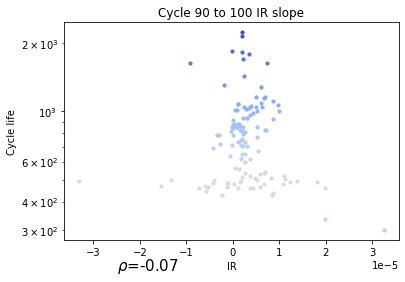

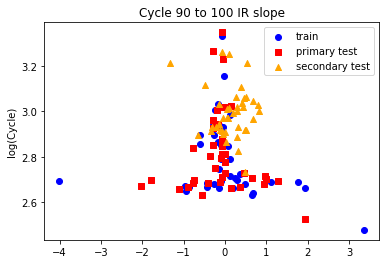

In [10]:
# 1.3 Cycle 90 to 100 IR slope 

train_slope=[]

test_slope=[]

sec_slope=[]

def IRSlope(x,y):
    Train_CyclePoint=np.array(range(x,y)).reshape(-1,1)
    IR_point=[]
    for k in range(x,y):
        IR_point.append(bat_dict[j]['summary']['IR'][k])
    label_IRPoint=np.array(IR_point).ravel()
    reg=LinearRegression()
    reg.fit(Train_CyclePoint,label_IRPoint)
    
    return reg.coef_

from sklearn.linear_model import LinearRegression

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if i in train_ind :
        slope=IRSlope(90,101)
        train_slope.append(slope)
        
    if i in test_ind :
        slope=IRSlope(90,101)
        test_slope.append(slope)        
            
    if i in secondary_test_ind:
        slope=IRSlope(90,101)
        sec_slope.append(slope)     
Train_slope=np.array(train_slope).reshape(-1,1)
Test_slope=np.array(test_slope).reshape(-1,1)
Sec_slope=np.array(sec_slope).reshape(-1,1)

Z3_train,Z3_test,Z3_sec=Z_score(Train_slope,Test_slope,Sec_slope)

a3=Train_slope.reshape(-1)
b3=Test_slope.reshape(-1)
c3=Sec_slope.reshape(-1)
X_stack3=np.hstack([a3,b3,c3])
                    
                    
for i in range(len(X_stack3)):
    plt.scatter(X_stack3[i], Y_stack[i],s=10,color=no1_color[i])
    plt.yscale('log')
    plt.xlabel('IR')
    plt.ylabel('Cycle life')
    plt.title('Cycle 90 to 100 IR slope')
r = np.round(np.corrcoef(X_stack3, logY_stack),2)
font={'size':15}
plt.text(-0.000025,200,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

plt.scatter(Z3_train,Cycle_train,color='blue',marker='o',label='train')
plt.scatter(Z3_test,Cycle_test,color='red',marker='s',label='primary test')
plt.scatter(Z3_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
plt.title('Cycle 90 to 100 IR slope')
plt.ylabel('log(Cycle)')
plt.legend()
plt.show()

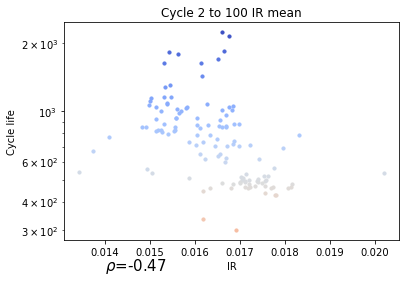

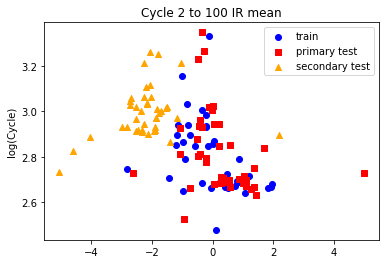

In [11]:
# 1.4 Cycle 2 to 100 IR mean 
train_mean=[]

test_mean=[]

sec_mean=[]

def meanIR(x,y):
    IR_point=[]
    for k in range(x,y):
        IR_point.append(bat_dict[j]['summary']['IR'][k])
    a=np.array(IR_point)
    mean_IR=np.mean(a)
    return mean_IR

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if i in train_ind :
        mean=meanIR(2,101)
        train_mean.append(mean)
        
    if i in test_ind :
        mean=meanIR(2,101)
        test_mean.append(mean)        
            
    if i in secondary_test_ind:
        mean=meanIR(2,101)
        sec_mean.append(mean)
        
Train_mean=np.array(train_mean).reshape(-1,1)
Test_mean=np.array(test_mean).reshape(-1,1)
Sec_mean=np.array(sec_mean).reshape(-1,1)

Z4_train,Z4_test,Z4_sec=Z_score(Train_mean,Test_mean,Sec_mean)

a4=Train_mean.reshape(-1)
b4=Test_mean.reshape(-1)
c4=Sec_mean.reshape(-1)
X_stack4=np.hstack([a4,b4,c4])
                    
                    
for i in range(len(X_stack4)):
    plt.scatter(X_stack4[i], Y_stack[i],s=10,color=no1_color[i])
    plt.yscale('log')
    plt.xlabel('IR')
    plt.ylabel('Cycle life')
    plt.title('Cycle 2 to 100 IR mean')
r = np.round(np.corrcoef(X_stack4, logY_stack),2)
font={'size':15}
plt.text(0.014,200,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

plt.scatter(Z4_train,Cycle_train,color='blue',marker='o',label='train')
plt.scatter(Z4_test,Cycle_test,color='red',marker='s',label='primary test')
plt.scatter(Z4_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
plt.title('Cycle 2 to 100 IR mean')
plt.ylabel('log(Cycle)')
plt.legend()
plt.show()

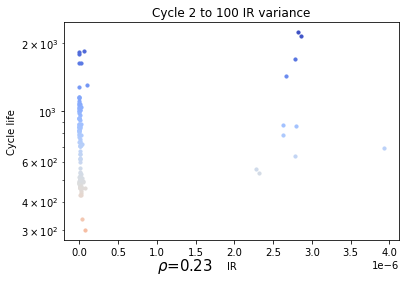

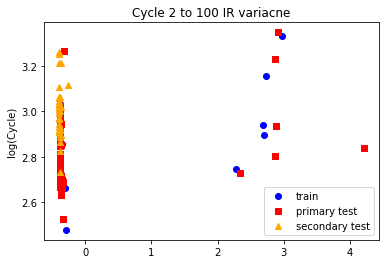

In [12]:
# 1.5 Cycle 2 to 100 IR variance 
train_var=[]

test_var=[]

sec_var=[]

def varIR(x,y):
    IR_point=[]
    for k in range(x,y):
        IR_point.append(bat_dict[j]['summary']['IR'][k])
    a=np.array(IR_point)
    var_IR=np.var(a)
    return var_IR

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if i in train_ind :
        var=varIR(2,101)
        train_var.append(var)
        
    if i in test_ind :
        var=varIR(2,101)
        test_var.append(var)        
            
    if i in secondary_test_ind:
        var=varIR(2,101)
        sec_var.append(var)
        
Train_var=np.array(train_var).reshape(-1,1)
Test_var=np.array(test_var).reshape(-1,1)
Sec_var=np.array(sec_var).reshape(-1,1)

Z5_train,Z5_test,Z5_sec=Z_score(Train_var,Test_var,Sec_var)

a5=Train_var.reshape(-1)
b5=Test_var.reshape(-1)
c5=Sec_var.reshape(-1)
X_stack5=np.hstack([a5,b5,c5])
                    
                    
for i in range(len(X_stack5)):
    plt.scatter(X_stack5[i], Y_stack[i],s=10,color=no1_color[i])
    plt.yscale('log')
    plt.xlabel('IR')
    plt.ylabel('Cycle life')
    plt.title('Cycle 2 to 100 IR variance')
r = np.round(np.corrcoef(X_stack5, logY_stack),2)
font={'size':15}
plt.text(1e-6,200,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

plt.scatter(Z5_train,Cycle_train,color='blue',marker='o',label='train')
plt.scatter(Z5_test,Cycle_test,color='red',marker='s',label='primary test')
plt.scatter(Z5_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
plt.title('Cycle 2 to 100 IR variacne')
plt.ylabel('log(Cycle)')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Cycle 2 to 100 IR variance')

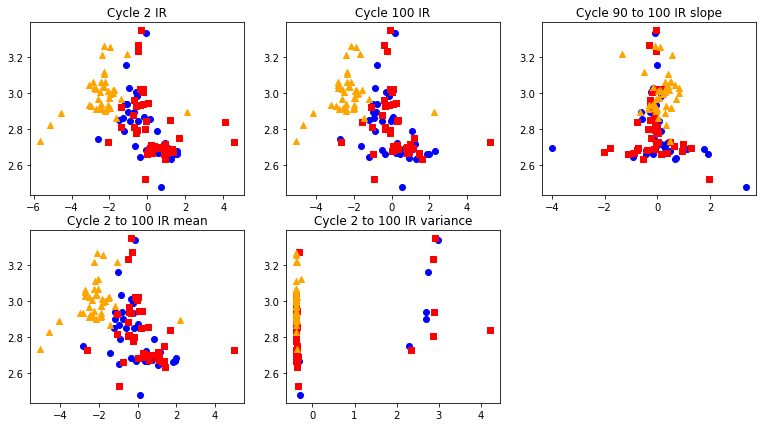

In [13]:
fig=plt.figure(figsize=(13,7))
ax1=fig.add_subplot(2,3,1)
ax1.scatter(Z1_train,Cycle_train,color='blue',marker='o',label='train')
ax1.scatter(Z1_test,Cycle_test,color='red',marker='s',label='primary test')
ax1.scatter(Z1_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
ax1.set_title('Cycle 2 IR')

ax2=fig.add_subplot(2,3,2)
ax2.scatter(Z2_train,Cycle_train,color='blue',marker='o',label='train')
ax2.scatter(Z2_test,Cycle_test,color='red',marker='s',label='primary test')
ax2.scatter(Z2_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
ax2.set_title('Cycle 100 IR')

ax3=fig.add_subplot(2,3,3)
ax3.scatter(Z3_train,Cycle_train,color='blue',marker='o',label='train')
ax3.scatter(Z3_test,Cycle_test,color='red',marker='s',label='primary test')
ax3.scatter(Z3_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
ax3.set_title('Cycle 90 to 100 IR slope')

ax4=fig.add_subplot(2,3,4)
ax4.scatter(Z4_train,Cycle_train,color='blue',marker='o',label='train')
ax4.scatter(Z4_test,Cycle_test,color='red',marker='s',label='primary test')
ax4.scatter(Z4_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
ax4.set_title('Cycle 2 to 100 IR mean')

ax5=fig.add_subplot(2,3,5)
ax5.scatter(Z5_train,Cycle_train,color='blue',marker='o',label='train')
ax5.scatter(Z5_test,Cycle_test,color='red',marker='s',label='primary test')
ax5.scatter(Z5_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
ax5.set_title('Cycle 2 to 100 IR variance')

In [14]:
#train,primary, secondary data 만들기
Train=np.hstack([Z1_train,Z2_train,Z3_train,Z4_train,Z5_train])
Test=np.hstack([Z1_test,Z2_test,Z3_test,Z4_test,Z5_test])
Sec=np.hstack([Z1_sec,Z2_sec,Z3_sec,Z4_sec,Z5_sec])
#train, primary, secondary 정답 데이터 만들기
label_train=Cycle_train.ravel()
label_test=Cycle_test.ravel()
label_sec=Cycle_sec.ravel()

In [15]:
Train.shape,Test.shape,Sec.shape

((41, 5), (42, 5), (40, 5))

In [16]:
from sklearn.linear_model import ElasticNetCV
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
from sklearn.metrics import mean_squared_error

reg = ElasticNetCV(cv=4).fit(Train,label_train)
print('ElasticNet CV alpha:',reg.alpha_)
print('ElasticNet CV coefficient:',reg.coef_)
print('ElasticNet CV intercept:',reg.intercept_)

ElasticNetcv=reg.predict(Train)
rmseElasticNetcv=np.sqrt(mean_squared_error(10**label_train,10**ElasticNetcv))
print('RMSE','           ','MAPE')
print(rmseElasticNetcv,MAPE(10**label_train,10**ElasticNetcv))

ElasticNet CV alpha: 0.036966946574918225
ElasticNet CV coefficient: [-0.0538146   0.         -0.00575702 -0.          0.04496958]
ElasticNet CV intercept: 2.793969897643637
RMSE             MAPE
271.49400575115646 20.876483147216888


In [17]:
ElasticNetcv2=reg.predict(Test)
rmseElasticNetcv2=np.sqrt(mean_squared_error(10**label_test,10**ElasticNetcv2))
print('RMSE','           ','MAPE')
print(rmseElasticNetcv2,MAPE(10**label_test,10**ElasticNetcv2))

RMSE             MAPE
357.3049951605101 24.575018014604506


In [18]:
ElasticNetcv3=reg.predict(Sec)
rmseElasticNetcv3=np.sqrt(mean_squared_error(10**label_sec,10**ElasticNetcv3))
print('RMSE','           ','MAPE')
print(rmseElasticNetcv3,MAPE(10**label_sec,10**ElasticNetcv3))

RMSE             MAPE
397.00472834390814 25.936885587793974


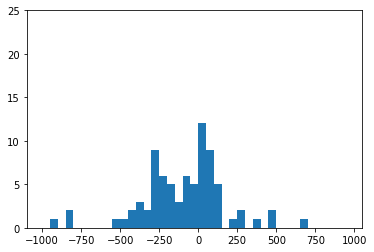

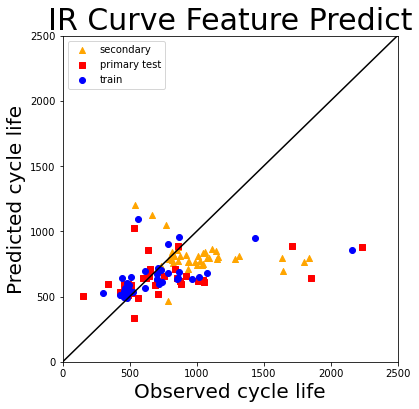

In [19]:
# ElasticNet
s_res=(10**ElasticNetcv3)-(10**label_sec)
p_res=(10**ElasticNetcv2)-(10**label_test)


s_res=s_res.reshape(-1,1)
p_res=p_res.reshape(-1,1)
his=np.vstack([p_res,s_res])


bins=np.arange(-1000,1000,50)# width 조절
plt.hist(his,bins)
plt.ylim(0,25)

x=[0,2500];y=[0,2500]
plt.figure(figsize=(6,6))
plt.plot(x,y,c='black')
plt.scatter(10**label_sec,10**ElasticNetcv3,color='orange',marker='^',label='secondary')
plt.scatter(10**label_test,10**ElasticNetcv2,color='red',marker='s',label='primary test')
plt.scatter(10**label_train,10**ElasticNetcv,color='blue',marker='o',label='train')
plt.xlabel('Observed cycle life',size=20)
plt.ylabel('Predicted cycle life',size=20)
plt.axis([0,2500,0,2500])
plt.title('IR Curve Feature Predict',size=30)
plt.legend()
#ax_sub=plt.axes([0.6,0.2,0.25,0.2])
#plt.ylim(0,25)
#ax_sub.hist(his,bins,color='black')
plt.show()

C:\Users\JanggoonKim\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
C:\Users\JanggoonKim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\JanggoonKim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2449721386769601, tolerance: 0.00010703521221153374
  positive)


<function matplotlib.pyplot.show(close=None, block=None)>

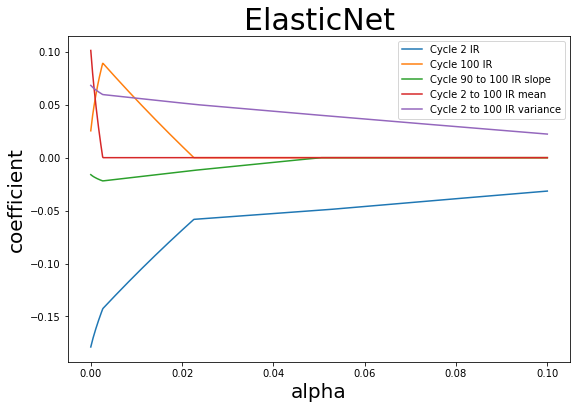

In [20]:
Y=[]
X=[]
from sklearn.linear_model import ElasticNet
plt.figure(figsize=(9,6))
for i in np.linspace(0,0.1,1000):
    regrplot=ElasticNet(alpha=i)
    regrplot.fit(Train,label_train)
    Y.append(regrplot.coef_)
    X.append(i)
Y_=np.array(Y)    
plt.plot(X,Y_[:,0],label='Cycle 2 IR')
plt.plot(X,Y_[:,1],label='Cycle 100 IR')
plt.plot(X,Y_[:,2],label='Cycle 90 to 100 IR slope')
plt.plot(X,Y_[:,3],label='Cycle 2 to 100 IR mean')
plt.plot(X,Y_[:,4],label='Cycle 2 to 100 IR variance')
plt.title('ElasticNet',size=30)
plt.xlabel('alpha',size=20)
plt.ylabel('coefficient',size=20)
plt.legend()
plt.show

# 기울기의 변화를 나타내보자.

1. Cycle 100- 2 차이

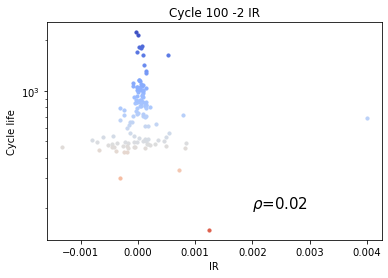

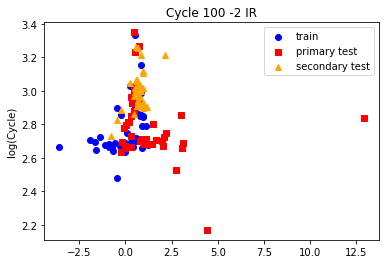

In [21]:
# 1.2.1 Cycle 100-2 IR 
Train_100_10=(Train_Cycle100_IR-Train_Cycle2_IR).reshape(-1,1)

Test_100_10=(Test_Cycle2_IR-Test_Cycle100_IR).reshape(-1,1)

Sec_100_10=(Sec_Cycle2_IR-Sec_Cycle100_IR).reshape(-1,1)

Z6_train,Z6_test,Z6_sec=Z_score(Train_100_10,Test_100_10,Sec_100_10)

a6=Train_100_10.reshape(-1)
b6=Test_100_10.reshape(-1)
c6=Sec_100_10.reshape(-1)
X_stack6=np.hstack([a6,b6,c6])
                    
                    
for i in range(len(X_stack6)):
    plt.scatter(X_stack6[i], Y_stack[i],s=10,color=no1_color[i])
    plt.yscale('log')
    plt.xlabel('IR')
    plt.ylabel('Cycle life')
    plt.title('Cycle 100 -2 IR')
r = np.round(np.corrcoef(X_stack6, logY_stack),2)
font={'size':15}
plt.text(0.002,200,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

plt.scatter(Z6_train,Cycle_train,color='blue',marker='o',label='train')
plt.scatter(Z6_test,Cycle_test,color='red',marker='s',label='primary test')
plt.scatter(Z6_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
plt.title('Cycle 100 -2 IR')
plt.ylabel('log(Cycle)')
plt.legend()
plt.show()

100 - 2 인데 음수인것이 많네?

2.IR Curve feature, Cycle 200
- Cycle 2 IR
- Cycle 100 IR (이 feature는 제거 전 후 비교하고 더 좋은 결과가 무엇인지 관찰해보기)
- Cycle 200 IR
- Cycle 190 to 200 slope
- Cycle 2 to 200 mean
- Cycle 2 to 200 variance

In [22]:
#train,primary, secondary data 만들기
Train=np.hstack([Z1_train,Z3_train,Z5_train])
Test=np.hstack([Z1_test,Z3_test,Z5_test])
Sec=np.hstack([Z1_sec,Z3_sec,Z5_sec])
#train, primary, secondary 정답 데이터 만들기
label_train=Cycle_train.ravel()
label_test=Cycle_test.ravel()
label_sec=Cycle_sec.ravel()

In [23]:
reg = ElasticNetCV(cv=4).fit(Train,label_train)
print('ElasticNet CV alpha:',reg.alpha_)
print('ElasticNet CV coefficient:',reg.coef_)
print('ElasticNet CV intercept:',reg.intercept_)

ElasticNetcv=reg.predict(Train)
rmseElasticNetcv=np.sqrt(mean_squared_error(10**label_train,10**ElasticNetcv))
print('RMSE','           ','MAPE')
print(rmseElasticNetcv,MAPE(10**label_train,10**ElasticNetcv))

ElasticNet CV alpha: 0.0012979803725302523
ElasticNet CV coefficient: [-0.06495464 -0.02140056  0.05842809]
ElasticNet CV intercept: 2.793969897643637
RMSE             MAPE
267.2737717495723 20.621282562557234


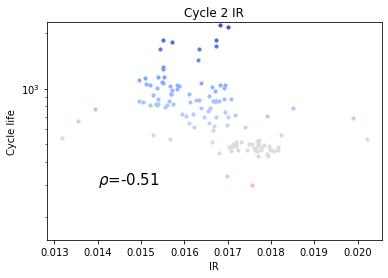

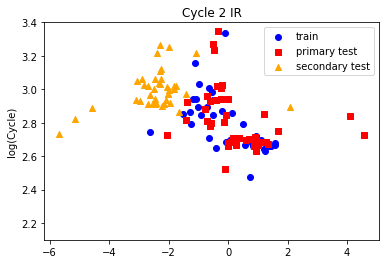

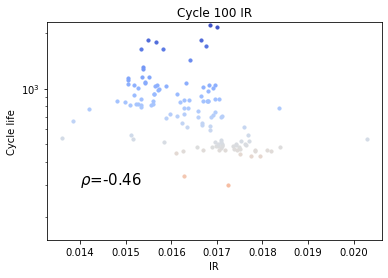

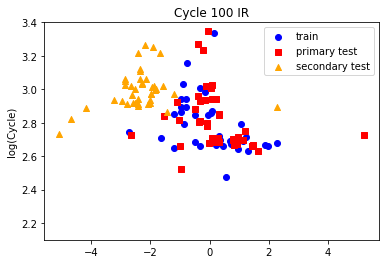

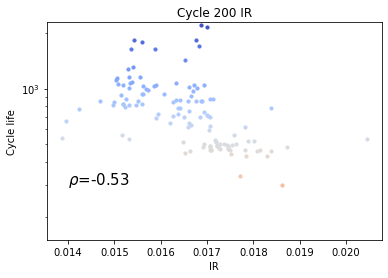

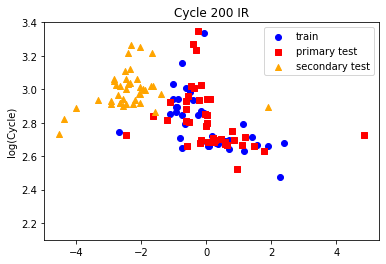

In [24]:
# 2.1. Cycle 2 IR 은 위에 데이터 사용(b2c1 제거 해야된다)
# 2.2. Cycle 100 IR 위에 데이터 사용(제거 및 추가 비교)
# 2.3. Cycle 200 IR

train_Cycle2_IR=[]
train_Cycle_life=[]

test_Cycle2_IR=[]
test_Cycle_life=[]

sec_Cycle2_IR=[]
sec_Cycle_life=[]

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if i in train_ind :
        train_Cycle2_IR.append(bat_dict[j]['summary']['IR'][2])
        train_Cycle_life.append(bat_dict[j]['cycle_life'][0][0])
        
    if i in test_ind :
        test_Cycle2_IR.append(bat_dict[j]['summary']['IR'][2])
        test_Cycle_life.append(bat_dict[j]['cycle_life'][0][0])
            
    if i in secondary_test_ind:
        sec_Cycle2_IR.append(bat_dict[j]['summary']['IR'][2])
        sec_Cycle_life.append(bat_dict[j]['cycle_life'][0][0])
        
Train_Cycle2_IR=np.array(train_Cycle2_IR)
Train_Cycle_life=np.array(train_Cycle_life)
Test_Cycle2_IR=np.array(test_Cycle2_IR)
Test_Cycle_life=np.array(test_Cycle_life)
Sec_Cycle2_IR=np.array(sec_Cycle2_IR)
Sec_Cycle_life=np.array(sec_Cycle_life)

TrainCycle2_IR=Train_Cycle2_IR.reshape(-1,1)
TestCycle2_IR=Test_Cycle2_IR.reshape(-1,1)
SecCycle2_IR=Sec_Cycle2_IR.reshape(-1,1)
Cycle_train=np.log10(Train_Cycle_life)
Cycle_test=np.log10(Test_Cycle_life)
Cycle_sec=np.log10(Sec_Cycle_life)

Z1_train,Z1_test,Z1_sec=Z_score(TrainCycle2_IR,TestCycle2_IR,SecCycle2_IR)

X_stack=np.hstack([Train_Cycle2_IR,Test_Cycle2_IR,Sec_Cycle2_IR])
Y_stack=np.hstack([Train_Cycle_life,Test_Cycle_life,Sec_Cycle_life])
logY_stack=np.hstack([Cycle_train,Cycle_test,Cycle_sec])
color=(logY_stack-2)/(np.log10(2300)-2)
no1_color=cm.coolwarm_r(color)
for i in range(len(X_stack)):
    plt.scatter(X_stack[i], Y_stack[i],s=10,color=no1_color[i])
    plt.yscale('log')
    plt.xlabel('IR')
    plt.ylabel('Cycle life')
    plt.title('Cycle 2 IR')
    plt.ylim([150,2300])
r = np.round(np.corrcoef(X_stack, logY_stack),2)
font={'size':15}
plt.text(0.014,300,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

plt.scatter(Z1_train,Cycle_train,color='blue',marker='o',label='train')
plt.scatter(Z1_test,Cycle_test,color='red',marker='s',label='primary test')
plt.scatter(Z1_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
plt.title('Cycle 2 IR')
plt.ylabel('log(Cycle)')
plt.ylim([2.1,3.4])
plt.legend()
plt.show()


train_Cycle100_IR=[]

test_Cycle100_IR=[]

sec_Cycle100_IR=[]

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if i in train_ind :
        train_Cycle100_IR.append(bat_dict[j]['summary']['IR'][100])
        
    if i in test_ind :
        test_Cycle100_IR.append(bat_dict[j]['summary']['IR'][100])
            
    if i in secondary_test_ind:
        sec_Cycle100_IR.append(bat_dict[j]['summary']['IR'][100])
        
Train_Cycle100_IR=np.array(train_Cycle100_IR)
Test_Cycle100_IR=np.array(test_Cycle100_IR)
Sec_Cycle100_IR=np.array(sec_Cycle100_IR)

TrainCycle100_IR=Train_Cycle100_IR.reshape(-1,1)
TestCycle100_IR=Test_Cycle100_IR.reshape(-1,1)
SecCycle100_IR=Sec_Cycle100_IR.reshape(-1,1)

Z2_train,Z2_test,Z2_sec=Z_score(TrainCycle100_IR,TestCycle100_IR,SecCycle100_IR)

X_stack2=np.hstack([Train_Cycle100_IR,Test_Cycle100_IR,Sec_Cycle100_IR])
for i in range(len(X_stack2)):
    plt.scatter(X_stack2[i], Y_stack[i],s=10,color=no1_color[i])
    plt.yscale('log')
    plt.xlabel('IR')
    plt.ylabel('Cycle life')
    plt.title('Cycle 100 IR')
    plt.ylim([150,2300])
r = np.round(np.corrcoef(X_stack2, logY_stack),2)
font={'size':15}
plt.text(0.014,300,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

plt.scatter(Z2_train,Cycle_train,color='blue',marker='o',label='train')
plt.scatter(Z2_test,Cycle_test,color='red',marker='s',label='primary test')
plt.scatter(Z2_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
plt.title('Cycle 100 IR')
plt.ylabel('log(Cycle)')
plt.ylim([2.1,3.4])
plt.legend()
plt.show()

train_Cycle200_IR=[]

test_Cycle200_IR=[]

sec_Cycle200_IR=[]

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if i in train_ind :
        train_Cycle200_IR.append(bat_dict[j]['summary']['IR'][200])
        
    if i in test_ind :
        test_Cycle200_IR.append(bat_dict[j]['summary']['IR'][200])
            
    if i in secondary_test_ind:
        sec_Cycle200_IR.append(bat_dict[j]['summary']['IR'][200])
        
Train_Cycle200_IR=np.array(train_Cycle200_IR)
Test_Cycle200_IR=np.array(test_Cycle200_IR)
Sec_Cycle200_IR=np.array(sec_Cycle200_IR)

TrainCycle200_IR=Train_Cycle200_IR.reshape(-1,1)
TestCycle200_IR=Test_Cycle200_IR.reshape(-1,1)
SecCycle200_IR=Sec_Cycle200_IR.reshape(-1,1)

Z2_1_train,Z2_1_test,Z2_1_sec=Z_score(TrainCycle200_IR,TestCycle200_IR,SecCycle200_IR)

X_stack2_1=np.hstack([Train_Cycle200_IR,Test_Cycle200_IR,Sec_Cycle200_IR])
for i in range(len(X_stack2_1)):
    plt.scatter(X_stack2_1[i], Y_stack[i],s=10,color=no1_color[i])
    plt.yscale('log')
    plt.xlabel('IR')
    plt.ylabel('Cycle life')
    plt.title('Cycle 200 IR')
    plt.ylim([150,2300])
r = np.round(np.corrcoef(X_stack2_1, logY_stack),2)
font={'size':15}
plt.text(0.014,300,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

plt.scatter(Z2_1_train,Cycle_train,color='blue',marker='o',label='train')
plt.scatter(Z2_1_test,Cycle_test,color='red',marker='s',label='primary test')
plt.scatter(Z2_1_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
plt.title('Cycle 200 IR')
plt.ylabel('log(Cycle)')
plt.ylim([2.1,3.4])
plt.legend()
plt.show()

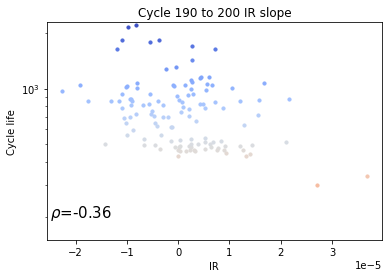

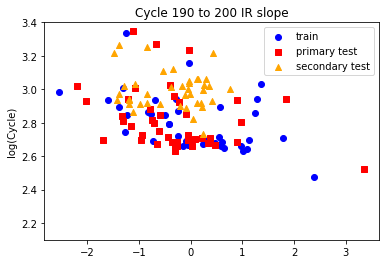

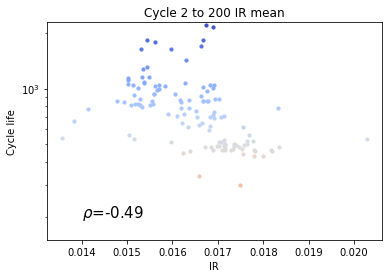

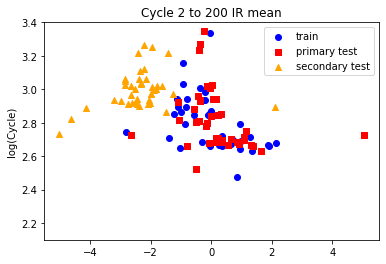

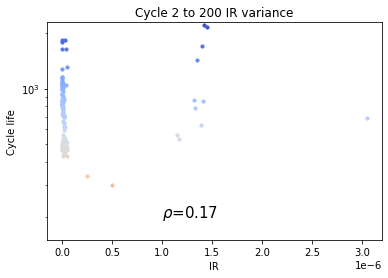

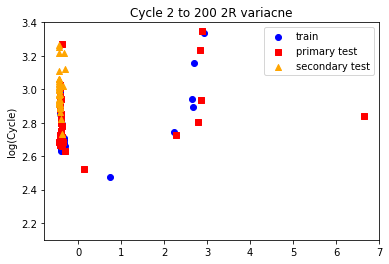

In [25]:
# 2.4 Cycle 190 to 200 slope

train_slope=[]

test_slope=[]

sec_slope=[]

def IRSlope(x,y):
    Train_CyclePoint=np.array(range(x,y)).reshape(-1,1)
    IR_point=[]
    for k in range(x,y):
        IR_point.append(bat_dict[j]['summary']['IR'][k])
    label_IRPoint=np.array(IR_point).ravel()
    reg=LinearRegression()
    reg.fit(Train_CyclePoint,label_IRPoint)
    
    return reg.coef_

from sklearn.linear_model import LinearRegression

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if i in train_ind :
        slope=IRSlope(190,201)
        train_slope.append(slope)
        
    if i in test_ind :
        slope=IRSlope(190,201)
        test_slope.append(slope)        
            
    if i in secondary_test_ind:
        slope=IRSlope(190,201)
        sec_slope.append(slope)     
Train_slope=np.array(train_slope).reshape(-1,1)
Test_slope=np.array(test_slope).reshape(-1,1)
Sec_slope=np.array(sec_slope).reshape(-1,1)

Z3_train,Z3_test,Z3_sec=Z_score(Train_slope,Test_slope,Sec_slope)

a3=Train_slope.reshape(-1)
b3=Test_slope.reshape(-1)
c3=Sec_slope.reshape(-1)
X_stack3=np.hstack([a3,b3,c3])
                    
                    
for i in range(len(X_stack3)):
    plt.scatter(X_stack3[i], Y_stack[i],s=10,color=no1_color[i])
    plt.yscale('log')
    plt.xlabel('IR')
    plt.ylabel('Cycle life')
    plt.title('Cycle 190 to 200 IR slope')
    plt.ylim([150,2300])
r = np.round(np.corrcoef(X_stack3, logY_stack),2)
font={'size':15}
plt.text(-0.000025,200,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

plt.scatter(Z3_train,Cycle_train,color='blue',marker='o',label='train')
plt.scatter(Z3_test,Cycle_test,color='red',marker='s',label='primary test')
plt.scatter(Z3_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
plt.title('Cycle 190 to 200 IR slope')
plt.ylabel('log(Cycle)')
plt.ylim([2.1,3.4])
plt.legend()
plt.show()

# 2.5 Cycle 2 to 200 IR mean 
train_mean=[]

test_mean=[]

sec_mean=[]

def meanIR(x,y):
    IR_point=[]
    for k in range(x,y):
        IR_point.append(bat_dict[j]['summary']['IR'][k])
    a=np.array(IR_point)
    mean_IR=np.mean(a)
    return mean_IR

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if i in train_ind :
        mean=meanIR(2,201)
        train_mean.append(mean)
        
    if i in test_ind :
        mean=meanIR(2,201)
        test_mean.append(mean)        
            
    if i in secondary_test_ind:
        mean=meanIR(2,201)
        sec_mean.append(mean)
        
Train_mean=np.array(train_mean).reshape(-1,1)
Test_mean=np.array(test_mean).reshape(-1,1)
Sec_mean=np.array(sec_mean).reshape(-1,1)

Z4_train,Z4_test,Z4_sec=Z_score(Train_mean,Test_mean,Sec_mean)

a4=Train_mean.reshape(-1)
b4=Test_mean.reshape(-1)
c4=Sec_mean.reshape(-1)
X_stack4=np.hstack([a4,b4,c4])
                    
                    
for i in range(len(X_stack4)):
    plt.scatter(X_stack4[i], Y_stack[i],s=10,color=no1_color[i])
    plt.yscale('log')
    plt.xlabel('IR')
    plt.ylabel('Cycle life')
    plt.title('Cycle 2 to 200 IR mean')
    plt.ylim([150,2300])
r = np.round(np.corrcoef(X_stack4, logY_stack),2)
font={'size':15}
plt.text(0.014,200,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

plt.scatter(Z4_train,Cycle_train,color='blue',marker='o',label='train')
plt.scatter(Z4_test,Cycle_test,color='red',marker='s',label='primary test')
plt.scatter(Z4_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
plt.title('Cycle 2 to 200 IR mean')
plt.ylabel('log(Cycle)')
plt.ylim([2.1,3.4])
plt.legend()
plt.show()

# 2.6 Cycle 2 to 200 IR variance 
train_var=[]

test_var=[]

sec_var=[]

def varIR(x,y):
    IR_point=[]
    for k in range(x,y):
        IR_point.append(bat_dict[j]['summary']['IR'][k])
    a=np.array(IR_point)
    var_IR=np.var(a)
    return var_IR

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if i in train_ind :
        var=varIR(2,201)
        train_var.append(var)
        
    if i in test_ind :
        var=varIR(2,201)
        test_var.append(var)        
            
    if i in secondary_test_ind:
        var=varIR(2,201)
        sec_var.append(var)
        
Train_var=np.array(train_var).reshape(-1,1)
Test_var=np.array(test_var).reshape(-1,1)
Sec_var=np.array(sec_var).reshape(-1,1)

Z5_train,Z5_test,Z5_sec=Z_score(Train_var,Test_var,Sec_var)

a5=Train_var.reshape(-1)
b5=Test_var.reshape(-1)
c5=Sec_var.reshape(-1)
X_stack5=np.hstack([a5,b5,c5])
                    
                    
for i in range(len(X_stack5)):
    plt.scatter(X_stack5[i], Y_stack[i],s=10,color=no1_color[i])
    plt.yscale('log')
    plt.xlabel('IR')
    plt.ylabel('Cycle life')
    plt.title('Cycle 2 to 200 IR variance')
    plt.ylim([150,2300])
r = np.round(np.corrcoef(X_stack5, logY_stack),2)
font={'size':15}
plt.text(1e-6,200,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

plt.scatter(Z5_train,Cycle_train,color='blue',marker='o',label='train')
plt.scatter(Z5_test,Cycle_test,color='red',marker='s',label='primary test')
plt.scatter(Z5_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
plt.title('Cycle 2 to 200 2R variacne')
plt.ylabel('log(Cycle)')
plt.ylim([2.1,3.4])
plt.legend()
plt.show()

Text(0.5, 1.0, 'Cycle 2 to 200 IR variance')

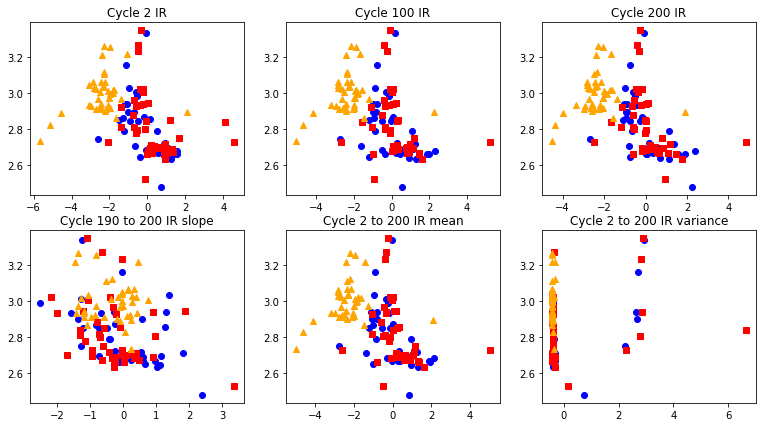

In [26]:
fig=plt.figure(figsize=(13,7))
ax1=fig.add_subplot(2,3,1)
ax1.scatter(Z1_train,Cycle_train,color='blue',marker='o',label='train')
ax1.scatter(Z1_test,Cycle_test,color='red',marker='s',label='primary test')
ax1.scatter(Z1_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
ax1.set_title('Cycle 2 IR')

ax2=fig.add_subplot(2,3,2)
ax2.scatter(Z2_train,Cycle_train,color='blue',marker='o',label='train')
ax2.scatter(Z2_test,Cycle_test,color='red',marker='s',label='primary test')
ax2.scatter(Z2_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
ax2.set_title('Cycle 100 IR')

ax3=fig.add_subplot(2,3,3)
ax3.scatter(Z2_1_train,Cycle_train,color='blue',marker='o',label='train')
ax3.scatter(Z2_1_test,Cycle_test,color='red',marker='s',label='primary test')
ax3.scatter(Z2_1_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
ax3.set_title('Cycle 200 IR')

ax3=fig.add_subplot(2,3,4)
ax3.scatter(Z3_train,Cycle_train,color='blue',marker='o',label='train')
ax3.scatter(Z3_test,Cycle_test,color='red',marker='s',label='primary test')
ax3.scatter(Z3_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
ax3.set_title('Cycle 190 to 200 IR slope')

ax4=fig.add_subplot(2,3,5)
ax4.scatter(Z4_train,Cycle_train,color='blue',marker='o',label='train')
ax4.scatter(Z4_test,Cycle_test,color='red',marker='s',label='primary test')
ax4.scatter(Z4_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
ax4.set_title('Cycle 2 to 200 IR mean')

ax5=fig.add_subplot(2,3,6)
ax5.scatter(Z5_train,Cycle_train,color='blue',marker='o',label='train')
ax5.scatter(Z5_test,Cycle_test,color='red',marker='s',label='primary test')
ax5.scatter(Z5_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
ax5.set_title('Cycle 2 to 200 IR variance')

In [27]:
#train,primary, secondary data 만들기
Train=np.hstack([Z1_train,Z2_train,Z2_1_train,Z3_train,Z4_train,Z5_train])
Test=np.hstack([Z1_test,Z2_test,Z2_1_test,Z3_test,Z4_test,Z5_test])
Sec=np.hstack([Z1_sec,Z2_sec,Z2_1_sec,Z3_sec,Z4_sec,Z5_sec])
#train, primary, secondary 정답 데이터 만들기
label_train=Cycle_train.ravel()
label_test=Cycle_test.ravel()
label_sec=Cycle_sec.ravel()

In [28]:
Train.shape,Test.shape,Sec.shape

((41, 6), (42, 6), (40, 6))

In [29]:
reg = ElasticNetCV(cv=4, tol=0.001).fit(Train,label_train)
print('ElasticNet CV alpha:',reg.alpha_)
print('ElasticNet CV coefficient:',reg.coef_)
print('ElasticNet CV intercept:',reg.intercept_)

ElasticNetcv=reg.predict(Train)
rmseElasticNetcv=np.sqrt(mean_squared_error(10**label_train,10**ElasticNetcv))
print('RMSE','           ','MAPE')
print(rmseElasticNetcv,MAPE(10**label_train,10**ElasticNetcv))

ElasticNet CV alpha: 0.021153845954523923
ElasticNet CV coefficient: [-0.03511957  0.         -0.00871856 -0.05146435 -0.          0.0513598 ]
ElasticNet CV intercept: 2.793969897643637
RMSE             MAPE
251.65519172707414 18.066272574340317


In [30]:
ElasticNetcv2=reg.predict(Test)
rmseElasticNetcv2=np.sqrt(mean_squared_error(10**label_test,10**ElasticNetcv2))
print('RMSE','           ','MAPE')
print(rmseElasticNetcv2,MAPE(10**label_test,10**ElasticNetcv2))

ElasticNetcv3=reg.predict(Sec)
rmseElasticNetcv3=np.sqrt(mean_squared_error(10**label_sec,10**ElasticNetcv3))
print('RMSE','           ','MAPE')
print(rmseElasticNetcv3,MAPE(10**label_sec,10**ElasticNetcv3))

RMSE             MAPE
345.1501945142233 25.279705637134796
RMSE             MAPE
387.7935574307218 25.846673222642746


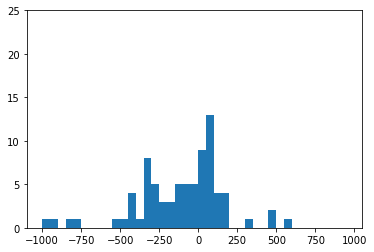

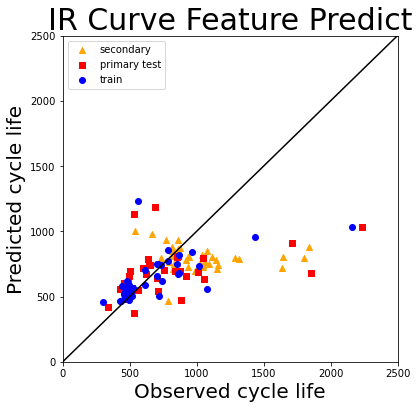

In [31]:
# ElasticNet
s_res=(10**ElasticNetcv3)-(10**label_sec)
p_res=(10**ElasticNetcv2)-(10**label_test)


s_res=s_res.reshape(-1,1)
p_res=p_res.reshape(-1,1)
his=np.vstack([p_res,s_res])


bins=np.arange(-1000,1000,50)# width 조절
plt.hist(his,bins)
plt.ylim(0,25)

x=[0,2500];y=[0,2500]
plt.figure(figsize=(6,6))
plt.plot(x,y,c='black')
plt.scatter(10**label_sec,10**ElasticNetcv3,color='orange',marker='^',label='secondary')
plt.scatter(10**label_test,10**ElasticNetcv2,color='red',marker='s',label='primary test')
plt.scatter(10**label_train,10**ElasticNetcv,color='blue',marker='o',label='train')
plt.xlabel('Observed cycle life',size=20)
plt.ylabel('Predicted cycle life',size=20)
plt.axis([0,2500,0,2500])
plt.title('IR Curve Feature Predict',size=30)
plt.legend()
#ax_sub=plt.axes([0.6,0.2,0.25,0.2])
#plt.ylim(0,25)
#ax_sub.hist(his,bins,color='black')
plt.show()

# 가중치가 0이 되는 (계수가 0)100 IR 제거

In [32]:
#train,primary, secondary data 만들기
Train=np.hstack([Z1_train,Z2_train,Z3_train,Z4_train,Z5_train])
Test=np.hstack([Z1_test,Z2_test,Z3_test,Z4_test,Z5_test])
Sec=np.hstack([Z1_sec,Z2_sec,Z3_sec,Z4_sec,Z5_sec])
#train, primary, secondary 정답 데이터 만들기
label_train=Cycle_train.ravel()
label_test=Cycle_test.ravel()
label_sec=Cycle_sec.ravel()

In [33]:
Train.shape,Test.shape,Sec.shape

((41, 5), (42, 5), (40, 5))

In [34]:
reg = ElasticNetCV(cv=4, tol=0.001).fit(Train,label_train)
print('ElasticNet CV alpha:',reg.alpha_)
print('ElasticNet CV coefficient:',reg.coef_)
print('ElasticNet CV intercept:',reg.intercept_)

ElasticNetcv=reg.predict(Train)
rmseElasticNetcv=np.sqrt(mean_squared_error(10**label_train,10**ElasticNetcv))
print('RMSE','           ','MAPE')
print(rmseElasticNetcv,MAPE(10**label_train,10**ElasticNetcv))

ElasticNet CV alpha: 0.021153845954523923
ElasticNet CV coefficient: [-0.04276306  0.         -0.05150694 -0.          0.05121717]
ElasticNet CV intercept: 2.793969897643637
RMSE             MAPE
251.10718652224932 17.9584081650558


# 계수가 0 이 되는 Cycle 200 IR , Mean 제거

In [35]:
#train,primary, secondary data 만들기
Train=np.hstack([Z1_train,Z3_train,Z5_train])
Test=np.hstack([Z1_test,Z3_test,Z5_test])
Sec=np.hstack([Z1_sec,Z3_sec,Z5_sec])
#train, primary, secondary 정답 데이터 만들기
label_train=Cycle_train.ravel()
label_test=Cycle_test.ravel()
label_sec=Cycle_sec.ravel()

In [36]:
Train.shape,Test.shape,Sec.shape

((41, 3), (42, 3), (40, 3))

In [37]:
reg = ElasticNetCV(cv=4, tol=0.001).fit(Train,label_train)
print('ElasticNet CV alpha:',reg.alpha_)
print('ElasticNet CV coefficient:',reg.coef_)
print('ElasticNet CV intercept:',reg.intercept_)

ElasticNetcv=reg.predict(Train)
rmseElasticNetcv=np.sqrt(mean_squared_error(10**label_train,10**ElasticNetcv))
print('RMSE','           ','MAPE')
print(rmseElasticNetcv,MAPE(10**label_train,10**ElasticNetcv))

ElasticNet CV alpha: 0.0052399691652242125
ElasticNet CV coefficient: [-0.04543718 -0.05906276  0.05876461]
ElasticNet CV intercept: 2.793969897643637
RMSE             MAPE
246.7360052103762 17.60314205351005


In [38]:
ElasticNetcv2=reg.predict(Test)
rmseElasticNetcv2=np.sqrt(mean_squared_error(10**label_test,10**ElasticNetcv2))
print('RMSE','           ','MAPE')
print(rmseElasticNetcv2,MAPE(10**label_test,10**ElasticNetcv2))

ElasticNetcv3=reg.predict(Sec)
rmseElasticNetcv3=np.sqrt(mean_squared_error(10**label_sec,10**ElasticNetcv3))
print('RMSE','           ','MAPE')
print(rmseElasticNetcv3,MAPE(10**label_sec,10**ElasticNetcv3))

RMSE             MAPE
338.8973638782238 25.330908767947314
RMSE             MAPE
386.88410792675757 26.353186818985836


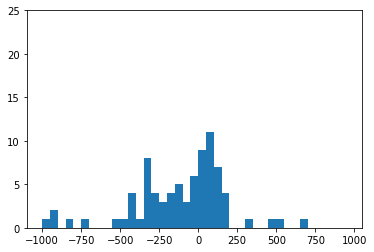

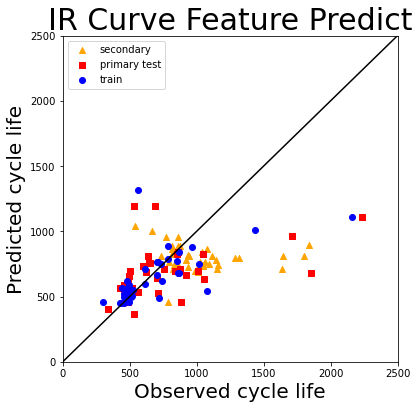

In [39]:
# ElasticNet
s_res=(10**ElasticNetcv3)-(10**label_sec)
p_res=(10**ElasticNetcv2)-(10**label_test)


s_res=s_res.reshape(-1,1)
p_res=p_res.reshape(-1,1)
his=np.vstack([p_res,s_res])


bins=np.arange(-1000,1000,50)# width 조절
plt.hist(his,bins)
plt.ylim(0,25)

x=[0,2500];y=[0,2500]
plt.figure(figsize=(6,6))
plt.plot(x,y,c='black')
plt.scatter(10**label_sec,10**ElasticNetcv3,color='orange',marker='^',label='secondary')
plt.scatter(10**label_test,10**ElasticNetcv2,color='red',marker='s',label='primary test')
plt.scatter(10**label_train,10**ElasticNetcv,color='blue',marker='o',label='train')
plt.xlabel('Observed cycle life',size=20)
plt.ylabel('Predicted cycle life',size=20)
plt.axis([0,2500,0,2500])
plt.title('IR Curve Feature Predict',size=30)
plt.legend()
#ax_sub=plt.axes([0.6,0.2,0.25,0.2])
#plt.ylim(0,25)
#ax_sub.hist(his,bins,color='black')
plt.show()

3.IR Curve feature, Cycle 300
- Cycle 2 IR
- Cycle 100 IR (이 feature는 제거 전 후 비교하고 더 좋은 결과가 무엇인지 관찰해보기)
- Cycle 200 IR (이 feature는 제거 전 후 비교하고 더 좋은 결과가 무엇인지 관찰해보기)
- Cycle 300 IR
- Cycle 290 to 300 slope
- Cycle 2 to 300 mean
- Cycle 2 to 300 variance

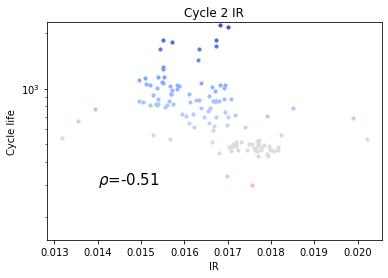

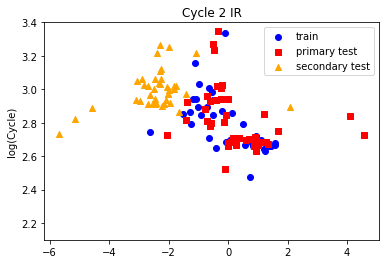

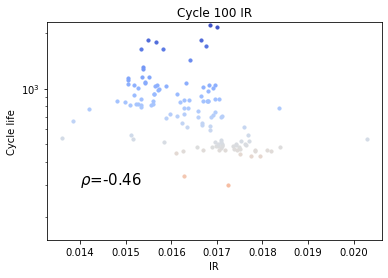

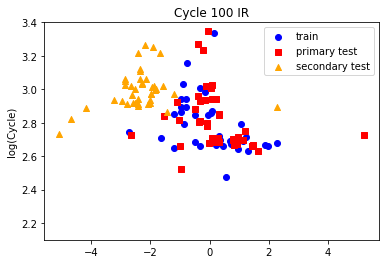

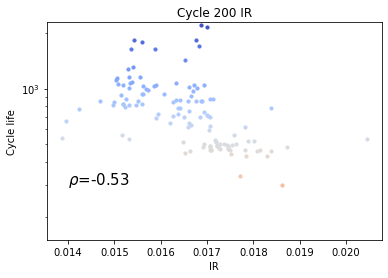

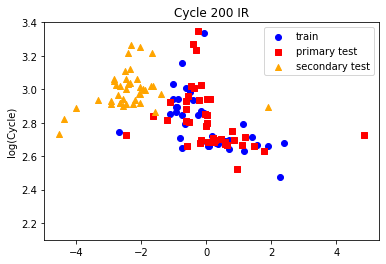

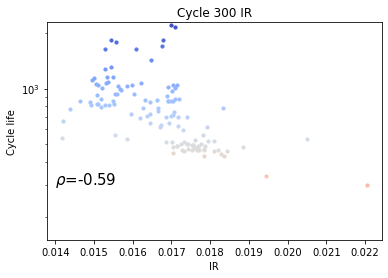

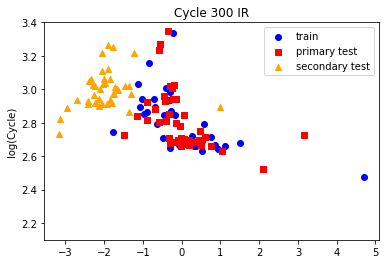

In [40]:
# 2.1. Cycle 2 IR 은 위에 데이터 사용(b2c1 제거 해야된다)
# 2.2. Cycle 100 IR 위에 데이터 사용(제거 및 추가 비교)
# 2.3. Cycle 200 IR
# 2.4. Cycle 300 IR

train_Cycle2_IR=[]
train_Cycle_life=[]

test_Cycle2_IR=[]
test_Cycle_life=[]

sec_Cycle2_IR=[]
sec_Cycle_life=[]

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if i in train_ind :
        train_Cycle2_IR.append(bat_dict[j]['summary']['IR'][2])
        train_Cycle_life.append(bat_dict[j]['cycle_life'][0][0])
        
    if i in test_ind :
        test_Cycle2_IR.append(bat_dict[j]['summary']['IR'][2])
        test_Cycle_life.append(bat_dict[j]['cycle_life'][0][0])
            
    if i in secondary_test_ind:
        sec_Cycle2_IR.append(bat_dict[j]['summary']['IR'][2])
        sec_Cycle_life.append(bat_dict[j]['cycle_life'][0][0])
        
Train_Cycle2_IR=np.array(train_Cycle2_IR)
Train_Cycle_life=np.array(train_Cycle_life)
Test_Cycle2_IR=np.array(test_Cycle2_IR)
Test_Cycle_life=np.array(test_Cycle_life)
Sec_Cycle2_IR=np.array(sec_Cycle2_IR)
Sec_Cycle_life=np.array(sec_Cycle_life)

TrainCycle2_IR=Train_Cycle2_IR.reshape(-1,1)
TestCycle2_IR=Test_Cycle2_IR.reshape(-1,1)
SecCycle2_IR=Sec_Cycle2_IR.reshape(-1,1)
Cycle_train=np.log10(Train_Cycle_life)
Cycle_test=np.log10(Test_Cycle_life)
Cycle_sec=np.log10(Sec_Cycle_life)

Z1_train,Z1_test,Z1_sec=Z_score(TrainCycle2_IR,TestCycle2_IR,SecCycle2_IR)

X_stack=np.hstack([Train_Cycle2_IR,Test_Cycle2_IR,Sec_Cycle2_IR])
Y_stack=np.hstack([Train_Cycle_life,Test_Cycle_life,Sec_Cycle_life])
logY_stack=np.hstack([Cycle_train,Cycle_test,Cycle_sec])
color=(logY_stack-2)/(np.log10(2300)-2)
no1_color=cm.coolwarm_r(color)
for i in range(len(X_stack)):
    plt.scatter(X_stack[i], Y_stack[i],s=10,color=no1_color[i])
    plt.yscale('log')
    plt.xlabel('IR')
    plt.ylabel('Cycle life')
    plt.title('Cycle 2 IR')
    plt.ylim([150,2300])
r = np.round(np.corrcoef(X_stack, logY_stack),2)
font={'size':15}
plt.text(0.014,300,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

plt.scatter(Z1_train,Cycle_train,color='blue',marker='o',label='train')
plt.scatter(Z1_test,Cycle_test,color='red',marker='s',label='primary test')
plt.scatter(Z1_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
plt.title('Cycle 2 IR')
plt.ylabel('log(Cycle)')
plt.ylim([2.1,3.4])
plt.legend()
plt.show()


train_Cycle100_IR=[]

test_Cycle100_IR=[]

sec_Cycle100_IR=[]

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if i in train_ind :
        train_Cycle100_IR.append(bat_dict[j]['summary']['IR'][100])
        
    if i in test_ind :
        test_Cycle100_IR.append(bat_dict[j]['summary']['IR'][100])
            
    if i in secondary_test_ind:
        sec_Cycle100_IR.append(bat_dict[j]['summary']['IR'][100])
        
Train_Cycle100_IR=np.array(train_Cycle100_IR)
Test_Cycle100_IR=np.array(test_Cycle100_IR)
Sec_Cycle100_IR=np.array(sec_Cycle100_IR)

TrainCycle100_IR=Train_Cycle100_IR.reshape(-1,1)
TestCycle100_IR=Test_Cycle100_IR.reshape(-1,1)
SecCycle100_IR=Sec_Cycle100_IR.reshape(-1,1)

Z2_train,Z2_test,Z2_sec=Z_score(TrainCycle100_IR,TestCycle100_IR,SecCycle100_IR)

X_stack2=np.hstack([Train_Cycle100_IR,Test_Cycle100_IR,Sec_Cycle100_IR])
for i in range(len(X_stack2)):
    plt.scatter(X_stack2[i], Y_stack[i],s=10,color=no1_color[i])
    plt.yscale('log')
    plt.xlabel('IR')
    plt.ylabel('Cycle life')
    plt.title('Cycle 100 IR')
    plt.ylim([150,2300])
r = np.round(np.corrcoef(X_stack2, logY_stack),2)
font={'size':15}
plt.text(0.014,300,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

plt.scatter(Z2_train,Cycle_train,color='blue',marker='o',label='train')
plt.scatter(Z2_test,Cycle_test,color='red',marker='s',label='primary test')
plt.scatter(Z2_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
plt.title('Cycle 100 IR')
plt.ylabel('log(Cycle)')
plt.ylim([2.1,3.4])
plt.legend()
plt.show()

train_Cycle200_IR=[]

test_Cycle200_IR=[]

sec_Cycle200_IR=[]

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if i in train_ind :
        train_Cycle200_IR.append(bat_dict[j]['summary']['IR'][200])
        
    if i in test_ind :
        test_Cycle200_IR.append(bat_dict[j]['summary']['IR'][200])
            
    if i in secondary_test_ind:
        sec_Cycle200_IR.append(bat_dict[j]['summary']['IR'][200])
        
Train_Cycle200_IR=np.array(train_Cycle200_IR)
Test_Cycle200_IR=np.array(test_Cycle200_IR)
Sec_Cycle200_IR=np.array(sec_Cycle200_IR)

TrainCycle200_IR=Train_Cycle200_IR.reshape(-1,1)
TestCycle200_IR=Test_Cycle200_IR.reshape(-1,1)
SecCycle200_IR=Sec_Cycle200_IR.reshape(-1,1)

Z2_1_train,Z2_1_test,Z2_1_sec=Z_score(TrainCycle200_IR,TestCycle200_IR,SecCycle200_IR)

X_stack2_1=np.hstack([Train_Cycle200_IR,Test_Cycle200_IR,Sec_Cycle200_IR])
for i in range(len(X_stack2_1)):
    plt.scatter(X_stack2_1[i], Y_stack[i],s=10,color=no1_color[i])
    plt.yscale('log')
    plt.xlabel('IR')
    plt.ylabel('Cycle life')
    plt.title('Cycle 200 IR')
    plt.ylim([150,2300])
r = np.round(np.corrcoef(X_stack2_1, logY_stack),2)
font={'size':15}
plt.text(0.014,300,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

plt.scatter(Z2_1_train,Cycle_train,color='blue',marker='o',label='train')
plt.scatter(Z2_1_test,Cycle_test,color='red',marker='s',label='primary test')
plt.scatter(Z2_1_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
plt.title('Cycle 200 IR')
plt.ylabel('log(Cycle)')
plt.ylim([2.1,3.4])
plt.legend()
plt.show()

train_Cycle300_IR=[]

test_Cycle300_IR=[]

sec_Cycle300_IR=[]

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if i in train_ind :
        train_Cycle300_IR.append(bat_dict[j]['summary']['IR'][300])
        
    if i in test_ind :
        test_Cycle300_IR.append(bat_dict[j]['summary']['IR'][300])
            
    if i in secondary_test_ind:
        sec_Cycle300_IR.append(bat_dict[j]['summary']['IR'][300])
        
Train_Cycle300_IR=np.array(train_Cycle300_IR)
Test_Cycle300_IR=np.array(test_Cycle300_IR)
Sec_Cycle300_IR=np.array(sec_Cycle300_IR)

TrainCycle300_IR=Train_Cycle300_IR.reshape(-1,1)
TestCycle300_IR=Test_Cycle300_IR.reshape(-1,1)
SecCycle300_IR=Sec_Cycle300_IR.reshape(-1,1)

Z2_2_train,Z2_2_test,Z2_2_sec=Z_score(TrainCycle300_IR,TestCycle300_IR,SecCycle300_IR)

X_stack2_2=np.hstack([Train_Cycle300_IR,Test_Cycle300_IR,Sec_Cycle300_IR])
for i in range(len(X_stack2_2)):
    plt.scatter(X_stack2_2[i], Y_stack[i],s=10,color=no1_color[i])
    plt.yscale('log')
    plt.xlabel('IR')
    plt.ylabel('Cycle life')
    plt.title('Cycle 300 IR')
    plt.ylim([150,2300])
r = np.round(np.corrcoef(X_stack2_2, logY_stack),2)
font={'size':15}
plt.text(0.014,300,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

plt.scatter(Z2_2_train,Cycle_train,color='blue',marker='o',label='train')
plt.scatter(Z2_2_test,Cycle_test,color='red',marker='s',label='primary test')
plt.scatter(Z2_2_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
plt.title('Cycle 300 IR')
plt.ylabel('log(Cycle)')
plt.ylim([2.1,3.4])
plt.legend()
plt.show()

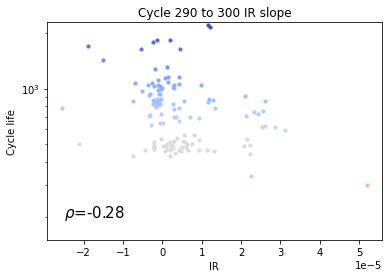

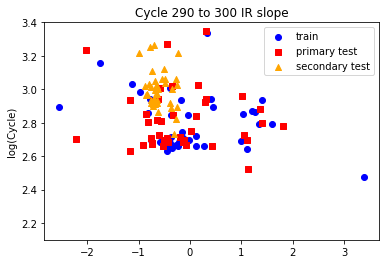

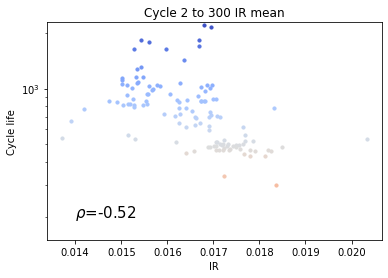

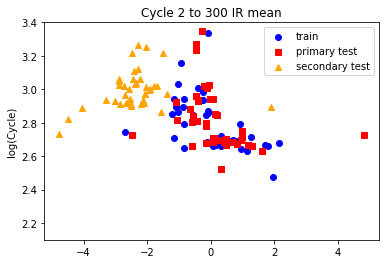

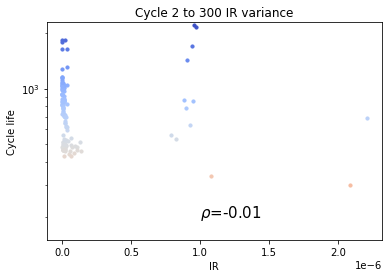

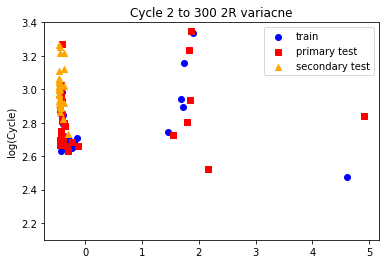

In [41]:
# 2.5 Cycle 290 to 300 slope

train_slope=[]

test_slope=[]

sec_slope=[]

def IRSlope(x,y):
    Train_CyclePoint=np.array(range(x,y)).reshape(-1,1)
    IR_point=[]
    for k in range(x,y):
        IR_point.append(bat_dict[j]['summary']['IR'][k])
    label_IRPoint=np.array(IR_point).ravel()
    reg=LinearRegression()
    reg.fit(Train_CyclePoint,label_IRPoint)
    
    return reg.coef_

from sklearn.linear_model import LinearRegression

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if i in train_ind :
        slope=IRSlope(290,301)
        train_slope.append(slope)
        
    if i in test_ind :
        slope=IRSlope(290,301)
        test_slope.append(slope)        
            
    if i in secondary_test_ind:
        slope=IRSlope(290,301)
        sec_slope.append(slope)     
Train_slope=np.array(train_slope).reshape(-1,1)
Test_slope=np.array(test_slope).reshape(-1,1)
Sec_slope=np.array(sec_slope).reshape(-1,1)

Z3_train,Z3_test,Z3_sec=Z_score(Train_slope,Test_slope,Sec_slope)

a3=Train_slope.reshape(-1)
b3=Test_slope.reshape(-1)
c3=Sec_slope.reshape(-1)
X_stack3=np.hstack([a3,b3,c3])
                    
                    
for i in range(len(X_stack3)):
    plt.scatter(X_stack3[i], Y_stack[i],s=10,color=no1_color[i])
    plt.yscale('log')
    plt.xlabel('IR')
    plt.ylabel('Cycle life')
    plt.title('Cycle 290 to 300 IR slope')
    plt.ylim([150,2300])
r = np.round(np.corrcoef(X_stack3, logY_stack),2)
font={'size':15}
plt.text(-0.000025,200,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

plt.scatter(Z3_train,Cycle_train,color='blue',marker='o',label='train')
plt.scatter(Z3_test,Cycle_test,color='red',marker='s',label='primary test')
plt.scatter(Z3_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
plt.title('Cycle 290 to 300 IR slope')
plt.ylabel('log(Cycle)')
plt.ylim([2.1,3.4])
plt.legend()
plt.show()

# 2.6 Cycle 2 to 300 IR mean 
train_mean=[]

test_mean=[]

sec_mean=[]

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if i in train_ind :
        mean=meanIR(2,301)
        train_mean.append(mean)
        
    if i in test_ind :
        mean=meanIR(2,301)
        test_mean.append(mean)        
            
    if i in secondary_test_ind:
        mean=meanIR(2,301)
        sec_mean.append(mean)
        
Train_mean=np.array(train_mean).reshape(-1,1)
Test_mean=np.array(test_mean).reshape(-1,1)
Sec_mean=np.array(sec_mean).reshape(-1,1)

Z4_train,Z4_test,Z4_sec=Z_score(Train_mean,Test_mean,Sec_mean)

a4=Train_mean.reshape(-1)
b4=Test_mean.reshape(-1)
c4=Sec_mean.reshape(-1)
X_stack4=np.hstack([a4,b4,c4])
                                 
for i in range(len(X_stack4)):
    plt.scatter(X_stack4[i], Y_stack[i],s=10,color=no1_color[i])
    plt.yscale('log')
    plt.xlabel('IR')
    plt.ylabel('Cycle life')
    plt.title('Cycle 2 to 300 IR mean')
    plt.ylim([150,2300])
r = np.round(np.corrcoef(X_stack4, logY_stack),2)
font={'size':15}
plt.text(0.014,200,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

plt.scatter(Z4_train,Cycle_train,color='blue',marker='o',label='train')
plt.scatter(Z4_test,Cycle_test,color='red',marker='s',label='primary test')
plt.scatter(Z4_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
plt.title('Cycle 2 to 300 IR mean')
plt.ylabel('log(Cycle)')
plt.ylim([2.1,3.4])
plt.legend()
plt.show()

# 2.7 Cycle 2 to 300 IR variance 
train_var=[]

test_var=[]

sec_var=[]

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if i in train_ind :
        var=varIR(2,301)
        train_var.append(var)
        
    if i in test_ind :
        var=varIR(2,301)
        test_var.append(var)        
            
    if i in secondary_test_ind:
        var=varIR(2,301)
        sec_var.append(var)
        
Train_var=np.array(train_var).reshape(-1,1)
Test_var=np.array(test_var).reshape(-1,1)
Sec_var=np.array(sec_var).reshape(-1,1)

Z5_train,Z5_test,Z5_sec=Z_score(Train_var,Test_var,Sec_var)

a5=Train_var.reshape(-1)
b5=Test_var.reshape(-1)
c5=Sec_var.reshape(-1)
X_stack5=np.hstack([a5,b5,c5])
                    
                    
for i in range(len(X_stack5)):
    plt.scatter(X_stack5[i], Y_stack[i],s=10,color=no1_color[i])
    plt.yscale('log')
    plt.xlabel('IR')
    plt.ylabel('Cycle life')
    plt.title('Cycle 2 to 300 IR variance')
    plt.ylim([150,2300])
r = np.round(np.corrcoef(X_stack5, logY_stack),2)
font={'size':15}
plt.text(1e-6,200,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

plt.scatter(Z5_train,Cycle_train,color='blue',marker='o',label='train')
plt.scatter(Z5_test,Cycle_test,color='red',marker='s',label='primary test')
plt.scatter(Z5_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
plt.title('Cycle 2 to 300 2R variacne')
plt.ylabel('log(Cycle)')
plt.ylim([2.1,3.4])
plt.legend()
plt.show()

Text(0.5, 1.0, 'Cycle 2 to 300 IR variance')

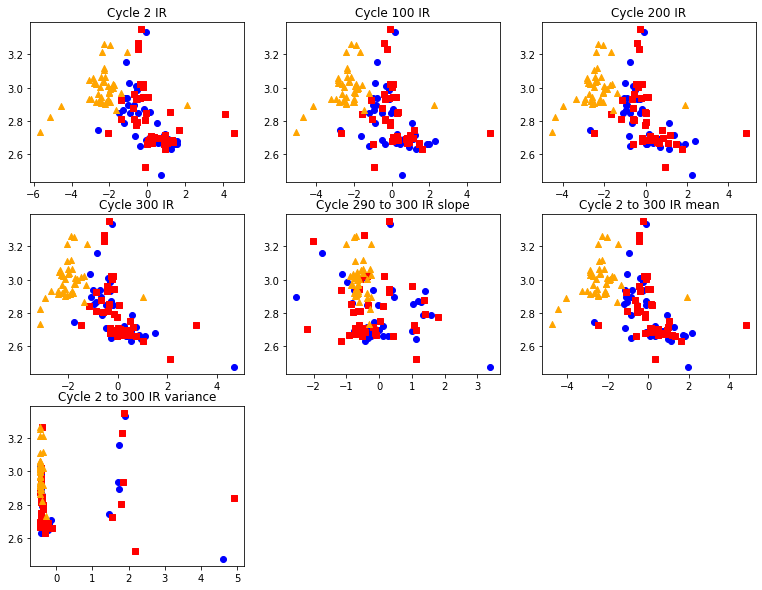

In [42]:
fig=plt.figure(figsize=(13,10))
ax1=fig.add_subplot(3,3,1)
ax1.scatter(Z1_train,Cycle_train,color='blue',marker='o',label='train')
ax1.scatter(Z1_test,Cycle_test,color='red',marker='s',label='primary test')
ax1.scatter(Z1_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
ax1.set_title('Cycle 2 IR')

ax2=fig.add_subplot(3,3,2)
ax2.scatter(Z2_train,Cycle_train,color='blue',marker='o',label='train')
ax2.scatter(Z2_test,Cycle_test,color='red',marker='s',label='primary test')
ax2.scatter(Z2_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
ax2.set_title('Cycle 100 IR')

ax3=fig.add_subplot(3,3,3)
ax3.scatter(Z2_1_train,Cycle_train,color='blue',marker='o',label='train')
ax3.scatter(Z2_1_test,Cycle_test,color='red',marker='s',label='primary test')
ax3.scatter(Z2_1_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
ax3.set_title('Cycle 200 IR')

ax4=fig.add_subplot(3,3,4)
ax4.scatter(Z2_2_train,Cycle_train,color='blue',marker='o',label='train')
ax4.scatter(Z2_2_test,Cycle_test,color='red',marker='s',label='primary test')
ax4.scatter(Z2_2_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
ax4.set_title('Cycle 300 IR')

ax5=fig.add_subplot(3,3,5)
ax5.scatter(Z3_train,Cycle_train,color='blue',marker='o',label='train')
ax5.scatter(Z3_test,Cycle_test,color='red',marker='s',label='primary test')
ax5.scatter(Z3_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
ax5.set_title('Cycle 290 to 300 IR slope')

ax6=fig.add_subplot(3,3,6)
ax6.scatter(Z4_train,Cycle_train,color='blue',marker='o',label='train')
ax6.scatter(Z4_test,Cycle_test,color='red',marker='s',label='primary test')
ax6.scatter(Z4_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
ax6.set_title('Cycle 2 to 300 IR mean')

ax7=fig.add_subplot(3,3,7)
ax7.scatter(Z5_train,Cycle_train,color='blue',marker='o',label='train')
ax7.scatter(Z5_test,Cycle_test,color='red',marker='s',label='primary test')
ax7.scatter(Z5_sec,Cycle_sec,color='orange',marker='^',label='secondary test')
ax7.set_title('Cycle 2 to 300 IR variance')

In [43]:
#train,primary, secondary data 만들기
Train=np.hstack([Z1_train,Z2_train,Z2_1_train,Z2_2_train,Z3_train,Z4_train,Z5_train])
Test=np.hstack([Z1_test,Z2_test,Z2_1_test,Z2_2_test,Z3_test,Z4_test,Z5_test])
Sec=np.hstack([Z1_sec,Z2_sec,Z2_1_sec,Z2_2_sec,Z3_sec,Z4_sec,Z5_sec])
#train, primary, secondary 정답 데이터 만들기
label_train=Cycle_train.ravel()
label_test=Cycle_test.ravel()
label_sec=Cycle_sec.ravel()

In [44]:
Train.shape,Test.shape,Sec.shape

((41, 7), (42, 7), (40, 7))

In [45]:
reg = ElasticNetCV(cv=4, tol=0.001).fit(Train,label_train)
print('ElasticNet CV alpha:',reg.alpha_)
print('ElasticNet CV coefficient:',reg.coef_)
print('ElasticNet CV intercept:',reg.intercept_)

ElasticNetcv=reg.predict(Train)
rmseElasticNetcv=np.sqrt(mean_squared_error(10**label_train,10**ElasticNetcv))
print('RMSE','           ','MAPE')
print(rmseElasticNetcv,MAPE(10**label_train,10**ElasticNetcv))

ElasticNet CV alpha: 0.006163457875949126
ElasticNet CV coefficient: [-8.50214201e-02  1.05501092e-01 -0.00000000e+00 -1.22346355e-01
  1.07343239e-04  0.00000000e+00  6.12871376e-02]
ElasticNet CV intercept: 2.7939698976436373
RMSE             MAPE
248.65993526663377 17.166242501028744


In [46]:
#train,primary, secondary data 만들기
Train=np.hstack([Z1_train,Z2_train,Z2_2_train,Z3_train,Z5_train])
Test=np.hstack([Z1_test,Z2_test,Z2_2_test,Z3_test,Z5_test])
Sec=np.hstack([Z1_sec,Z2_sec,Z2_2_sec,Z3_sec,Z5_sec])
#train, primary, secondary 정답 데이터 만들기
label_train=Cycle_train.ravel()
label_test=Cycle_test.ravel()
label_sec=Cycle_sec.ravel()

In [47]:
reg = ElasticNetCV(cv=4, tol=0.001).fit(Train,label_train)
print('ElasticNet CV alpha:',reg.alpha_)
print('ElasticNet CV coefficient:',reg.coef_)
print('ElasticNet CV intercept:',reg.intercept_)

ElasticNetcv=reg.predict(Train)
rmseElasticNetcv=np.sqrt(mean_squared_error(10**label_train,10**ElasticNetcv))
print('RMSE','           ','MAPE')
print(rmseElasticNetcv,MAPE(10**label_train,10**ElasticNetcv))

ElasticNet CV alpha: 0.006163457875949126
ElasticNet CV coefficient: [-0.08452318  0.10529399 -0.12266367  0.00022965  0.0614226 ]
ElasticNet CV intercept: 2.7939698976436373
RMSE             MAPE
248.63917803956352 17.1661613317418


In [48]:
ElasticNetcv2=reg.predict(Test)
rmseElasticNetcv2=np.sqrt(mean_squared_error(10**label_test,10**ElasticNetcv2))
print('RMSE','           ','MAPE')
print(rmseElasticNetcv2,MAPE(10**label_test,10**ElasticNetcv2))

ElasticNetcv3=reg.predict(Sec)
rmseElasticNetcv3=np.sqrt(mean_squared_error(10**label_sec,10**ElasticNetcv3))
print('RMSE','           ','MAPE')
print(rmseElasticNetcv3,MAPE(10**label_sec,10**ElasticNetcv3))

RMSE             MAPE
334.3000812318131 23.56794458837715
RMSE             MAPE
358.2046552682487 24.401384256399403


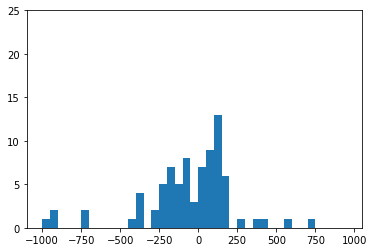

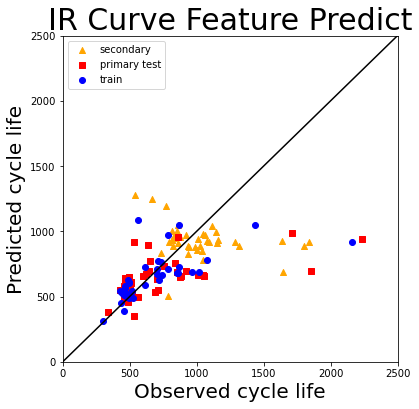

In [49]:
# ElasticNet
s_res=(10**ElasticNetcv3)-(10**label_sec)
p_res=(10**ElasticNetcv2)-(10**label_test)


s_res=s_res.reshape(-1,1)
p_res=p_res.reshape(-1,1)
his=np.vstack([p_res,s_res])


bins=np.arange(-1000,1000,50)# width 조절
plt.hist(his,bins)
plt.ylim(0,25)

x=[0,2500];y=[0,2500]
plt.figure(figsize=(6,6))
plt.plot(x,y,c='black')
plt.scatter(10**label_sec,10**ElasticNetcv3,color='orange',marker='^',label='secondary')
plt.scatter(10**label_test,10**ElasticNetcv2,color='red',marker='s',label='primary test')
plt.scatter(10**label_train,10**ElasticNetcv,color='blue',marker='o',label='train')
plt.xlabel('Observed cycle life',size=20)
plt.ylabel('Predicted cycle life',size=20)
plt.axis([0,2500,0,2500])
plt.title('IR Curve Feature Predict',size=30)
plt.legend()
#ax_sub=plt.axes([0.6,0.2,0.25,0.2])
#plt.ylim(0,25)
#ax_sub.hist(his,bins,color='black')
plt.show()

# Cycle 100, Cycle 200 과 동일한 featrue를 사용했을 때 결과와 Cycle 300의 결과가 다르다

In [50]:
#train,primary, secondary data 만들기
Train=np.hstack([Z1_train,Z3_train,Z5_train])
Test=np.hstack([Z1_test,Z3_test,Z5_test])
Sec=np.hstack([Z1_sec,Z3_sec,Z5_sec])
#train, primary, secondary 정답 데이터 만들기
label_train=Cycle_train.ravel()
label_test=Cycle_test.ravel()
label_sec=Cycle_sec.ravel()

In [51]:
reg = ElasticNetCV(cv=4).fit(Train,label_train)
print('ElasticNet CV alpha:',reg.alpha_)
print('ElasticNet CV coefficient:',reg.coef_)
print('ElasticNet CV intercept:',reg.intercept_)

ElasticNetcv=reg.predict(Train)
rmseElasticNetcv=np.sqrt(mean_squared_error(10**label_train,10**ElasticNetcv))
print('RMSE','           ','MAPE')
print(rmseElasticNetcv,MAPE(10**label_train,10**ElasticNetcv))

ElasticNet CV alpha: 0.08539844120410606
ElasticNet CV coefficient: [-0.04727486 -0.          0.        ]
ElasticNet CV intercept: 2.793969897643637
RMSE             MAPE
304.7425306625189 23.154111813392948


# Cycle 300에서 Cycle 100, Cycle 200에서 사용한 5 개 feature 사용 결과

In [52]:
#train,primary, secondary data 만들기
Train=np.hstack([Z1_train,Z2_2_train,Z3_train,Z4_train,Z5_train])
Test=np.hstack([Z1_test,Z2_2_test,Z3_test,Z4_test,Z5_test])
Sec=np.hstack([Z1_sec,Z2_2_sec,Z3_sec,Z4_sec,Z5_sec])
#train, primary, secondary 정답 데이터 만들기
label_train=Cycle_train.ravel()
label_test=Cycle_test.ravel()
label_sec=Cycle_sec.ravel()

reg = ElasticNetCV(cv=4).fit(Train,label_train)
print('ElasticNet CV alpha:',reg.alpha_)
print('ElasticNet CV coefficient:',reg.coef_)
print('ElasticNet CV intercept:',reg.intercept_)

ElasticNetcv=reg.predict(Train)
rmseElasticNetcv=np.sqrt(mean_squared_error(10**label_train,10**ElasticNetcv))
print('RMSE','           ','MAPE')
print(rmseElasticNetcv,MAPE(10**label_train,10**ElasticNetcv))

ElasticNet CV alpha: 0.03781840601041197
ElasticNet CV coefficient: [-0.03014832 -0.05707335 -0.         -0.          0.01232523]
ElasticNet CV intercept: 2.793969897643637
RMSE             MAPE
289.4130675254108 19.932839124347833
